In [1]:
import tensorflow as tf
import tensorflow.keras.layers as layers
import tensorflow_datasets as tfds

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

D:\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
D:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
file_en = open('en.txt','r',encoding='utf-8').readlines()
file_cn = open('cn.txt','r',encoding='utf-8').readlines()
en = []
cn = []
for e,c in zip(file_en,file_cn):
    en.append(e.strip())
    cn.append(c.strip())

In [3]:
en

['1929 or 1989?',
 'PARIS – As the economic crisis deepens and widens, the world has been searching for historical analogies to help us understand what has been happening.',
 'At the start of the crisis, many people likened it to 1982 or 1973, which was reassuring, because both dates refer to classical cyclical downturns.',
 'Today, the mood is much grimmer, with references to 1929 and 1931 beginning to abound, even if some governments continue to behave as if the crisis was more classical than exceptional.',
 'The tendency is either excessive restraint (Europe) or a diffusion of the effort (the United States).',
 'Europe is being cautious in the name of avoiding debt and defending the euro, whereas the US has moved on many fronts in order not to waste an ideal opportunity to implement badly needed structural reforms.',
 'For geo-strategists, however, the year that naturally comes to mind, in both politics and economics, is 1989.',
 'Of course, the fall of the house of Lehman Brothers 

In [4]:
cn

['1929年还是1989年?',
 '巴黎-随着经济危机不断加深和蔓延，整个世界一直在寻找历史上的类似事件希望有助于我们了解目前正在发生的情况。',
 '一开始，很多人把这次危机比作1982年或1973年所发生的情况，这样得类比是令人宽心的，因为这两段时期意味着典型的周期性衰退。',
 '如今人们的心情却是沉重多了，许多人开始把这次危机与1929年和1931年相比，即使一些国家政府的表现仍然似乎把视目前的情况为是典型的而看见的衰退。',
 '目前的趋势是，要么是过度的克制（欧洲），要么是努力的扩展（美国）。',
 '欧洲在避免债务和捍卫欧元的名义下正变得谨慎，而美国已经在许多方面行动起来，以利用这一理想的时机来实行急需的结构性改革。',
 '然而，作为地域战略学家，无论是从政治意义还是从经济意义上，让我自然想到的年份是1989年。',
 '当然，雷曼兄弟公司的倒闭和柏林墙的倒塌没有任何关系。',
 '事实上，从表面上看，两者似乎是完全是相反的：一个是象征着压抑和人为分裂的柏林墙的倒塌，而另一个是看似坚不可摧的并令人安心的金融资本主义机构的倒塌。',
 '然而，和1989年一样，2008-2009年很可能也能被视为一个划时代的改变，其带来的发人深省的后果将在几十年后仍能让我们感受得到。',
 '东西方意识形态鸿沟的结束，以及对市场绝对信心的后果，都是历史的转折点。',
 '而2009年所发生的事情可能会威胁1989年革命所带来的积极成果，包括欧洲的和平统一和民主制度战胜了民族主义倾向，如果不是恐外倾向的话。',
 '1989年，自由民主战胜了由苏联集团具体化并推崇的社会主义意识形态。',
 '对于里根总统的许多的支持者来说，就是他精心策划的军备竞赛的升级，把苏联经济推向了崩溃的边缘，从而充分显示了自由社会和自由市场的优越性。',
 '当然，现在的情况和1989年的情况明显不同了。',
 '首先，也许是最重要的，1989年的革命和随后的苏联解体结束了全球的两极化。',
 '与此相反，2009年很可能会为一种新的两极化形式铺平道路，只是中国取代了苏联。',
 '其二，民主制度和市场资本主义，或许要比预期的要脆弱些，看来确实是当时的赢家。 而在2009年，随着全球危机的蔓延，却很难区分赢家和输家；',
 '每个人似乎都是输家，即使有些国家比其它国家受到的影响更大。',
 

In [5]:
data = {'en':en,'cn':cn}
dataframe = pd.DataFrame(data)

In [6]:
dataframe.head(10)

,en,cn
0,1929 or 1989?,1929年还是1989年?
1,PARIS – As the economic crisis deepens and wid...,巴黎-随着经济危机不断加深和蔓延，整个世界一直在寻找历史上的类似事件希望有助于我们了解目前正...
2,"At the start of the crisis, many people likene...",一开始，很多人把这次危机比作1982年或1973年所发生的情况，这样得类比是令人宽心的，因为...
3,"Today, the mood is much grimmer, with referenc...",如今人们的心情却是沉重多了，许多人开始把这次危机与1929年和1931年相比，即使一些国家政...
4,The tendency is either excessive restraint (Eu...,目前的趋势是，要么是过度的克制（欧洲），要么是努力的扩展（美国）。
5,Europe is being cautious in the name of avoidi...,欧洲在避免债务和捍卫欧元的名义下正变得谨慎，而美国已经在许多方面行动起来，以利用这一理想的时...
6,"For geo-strategists, however, the year that na...",然而，作为地域战略学家，无论是从政治意义还是从经济意义上，让我自然想到的年份是1989年。
7,"Of course, the fall of the house of Lehman Bro...",当然，雷曼兄弟公司的倒闭和柏林墙的倒塌没有任何关系。
8,"Indeed, on the surface it seems to be its perf...",事实上，从表面上看，两者似乎是完全是相反的：一个是象征着压抑和人为分裂的柏林墙的倒塌，而另一...
9,"Yet 2008-2009, like 1989, may very well corres...",然而，和1989年一样，2008-2009年很可能也能被视为一个划时代的改变，其带来的发人深...


In [7]:
import tensorflow_text as tf_text

In [8]:
tokenizer = tf_text.WhitespaceTokenizer()
tokens = tokenizer.tokenize(["PARIS – As the economic crisis deepens and widens, the world has been searching for historical analogies to help us understand what has been happening."])
print(tokens.to_list())

Instructions for updating:
`tf.batch_gather` is deprecated, please use `tf.gather` with `batch_dims=-1` instead.
[[b'PARIS', b'\xe2\x80\x93', b'As', b'the', b'economic', b'crisis', b'deepens', b'and', b'widens,', b'the', b'world', b'has', b'been', b'searching', b'for', b'historical', b'analogies', b'to', b'help', b'us', b'understand', b'what', b'has', b'been', b'happening.']]


In [9]:
MODEL_HANDLE = "https://tfhub.dev/google/zh_segmentation/1"
segmenter = tf_text.HubModuleTokenizer(MODEL_HANDLE)
tokens = segmenter.tokenize(["巴黎-随着经济危机不断加深和蔓延，整个世界一直在寻找历史上的类似事件希望有助于我们了解目前正在发生的情况。"])
print(tokens.to_list())

[[b'\xe5\xb7\xb4\xe9\xbb\x8e', b'-', b'\xe9\x9a\x8f\xe7\x9d\x80', b'\xe7\xbb\x8f\xe6\xb5\x8e', b'\xe5\x8d\xb1\xe6\x9c\xba', b'\xe4\xb8\x8d\xe6\x96\xad', b'\xe5\x8a\xa0\xe6\xb7\xb1', b'\xe5\x92\x8c', b'\xe8\x94\x93\xe5\xbb\xb6', b'\xef\xbc\x8c', b'\xe6\x95\xb4', b'\xe4\xb8\xaa', b'\xe4\xb8\x96\xe7\x95\x8c', b'\xe4\xb8\x80\xe7\x9b\xb4', b'\xe5\x9c\xa8', b'\xe5\xaf\xbb\xe6\x89\xbe', b'\xe5\x8e\x86\xe5\x8f\xb2', b'\xe4\xb8\x8a', b'\xe7\x9a\x84', b'\xe7\xb1\xbb\xe4\xbc\xbc', b'\xe4\xba\x8b\xe4\xbb\xb6', b'\xe5\xb8\x8c\xe6\x9c\x9b', b'\xe6\x9c\x89\xe5\x8a\xa9\xe4\xba\x8e', b'\xe6\x88\x91\xe4\xbb\xac', b'\xe4\xba\x86\xe8\xa7\xa3', b'\xe7\x9b\xae\xe5\x89\x8d', b'\xe6\xad\xa3\xe5\x9c\xa8', b'\xe5\x8f\x91\xe7\x94\x9f', b'\xe7\x9a\x84', b'\xe6\x83\x85\xe5\x86\xb5', b'\xe3\x80\x82']]


In [10]:
def decode_list(x):
    if type(x) is list:
        return list(map(decode_list, x))
    return x.decode("UTF-8")

def decode_utf8_tensor(x):
    return list(map(decode_list, x.to_list()))

print(decode_utf8_tensor(tokens))

[['巴黎', '-', '随着', '经济', '危机', '不断', '加深', '和', '蔓延', '，', '整', '个', '世界', '一直', '在', '寻找', '历史', '上', '的', '类似', '事件', '希望', '有助于', '我们', '了解', '目前', '正在', '发生', '的', '情况', '。']]


In [11]:
tokenizer_en = tfds.features.text.SubwordTextEncoder.build_from_corpus((' '.join(e) for e in en), target_vocab_size=2**13)
tokenizer_cn = tfds.features.text.SubwordTextEncoder.build_from_corpus(( c for c in cn), target_vocab_size=2**13)

In [12]:
sample_str = '我是你爸爸。'
tokenized_str = tokenizer_cn.encode(sample_str)
print(tokenized_str)
original_str = tokenizer_cn.decode(tokenized_str)
print(original_str)

[124, 10, 448, 8248, 8153, 8201, 8248, 8153, 8201, 2]
我是你爸爸。


In [13]:
sample_str = 'hello world, tensorflow 2'
tokenized_str = tokenizer_en.encode(sample_str)
print(tokenized_str)
original_str = tokenizer_en.decode(tokenized_str)
print(original_str)

[1043, 1040, 1047, 1047, 6, 1058, 1050, 1053, 1047, 1039, 983, 971, 1055, 1040, 1049, 1054, 1050, 1053, 1041, 1047, 1050, 20, 989]
hello world, tensorflow 2


In [14]:
cn = [tokenizer_cn.encode(line)for line in cn]
en= [tokenizer_en.encode(' '.join(line))for line in en]

en_ = []
for i in en :
    en_.append([tokenizer_en.vocab_size]+list(i)+[tokenizer_en.vocab_size+1])
cn_ = []
for i in cn :
    cn_.append([tokenizer_cn.vocab_size]+list(i)+[tokenizer_cn.vocab_size+1])
    
en_text=tf.keras.preprocessing.sequence.pad_sequences(en_, maxlen=40, dtype='int32', padding='post',value=0.0)
cn_text=tf.keras.preprocessing.sequence.pad_sequences(cn_, maxlen=40, dtype='int32', padding='post',value=0.0)

en_batch = tf.data.Dataset.from_tensor_slices(en_text)
cn_batch = tf.data.Dataset.from_tensor_slices(cn_text)

en_batch  = en_batch.padded_batch(64)
cn_batch = cn_batch.padded_batch(64)

In [15]:
"""
def encode(lang1, lang2):
    lang1 = [tokenizer_pt.vocab_size] + tokenizer_pt.encode(
        lang1.numpy()) + [tokenizer_pt.vocab_size+1]
    lang2 = [tokenizer_en.vocab_size] + tokenizer_en.encode(
        lang2.numpy()) + [tokenizer_en.vocab_size+1]
    return lang1, lang2

MAX_LENGTH=100
def filter_long_sent(x, y, max_length=MAX_LENGTH):
    return tf.logical_and(tf.size(x) <= max_length,
                         tf.size(y) <= max_length)
                         
def tf_encode(cn, en):
    return tf.py_function(encode, [cn, en], [tf.int64, tf.int64])
    
BUFFER_SIZE = 20000
BATCH_SIZE = 64

# 使用.map()运行相关图操作
train_dataset = train_examples.map(tf_encode)
# 过滤过长的数据
train_dataset = train_dataset.filter(filter_long_sent)
# 使用缓存数据加速读入
train_dataset = train_dataset.cache()
# 打乱并获取批数据
train_dataset = train_dataset.padded_batch(
BATCH_SIZE, padded_shapes=([40], [40]))  # 填充为最大长度-90
# 设置预取数据
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)

# 验证集数据
val_dataset = val_examples.map(tf_encode)
val_dataset = val_dataset.filter(filter_long_sent).padded_batch(
BATCH_SIZE, padded_shapes=([40], [40]))
"""


'\ndef encode(lang1, lang2):\n    lang1 = [tokenizer_pt.vocab_size] + tokenizer_pt.encode(\n        lang1.numpy()) + [tokenizer_pt.vocab_size+1]\n    lang2 = [tokenizer_en.vocab_size] + tokenizer_en.encode(\n        lang2.numpy()) + [tokenizer_en.vocab_size+1]\n    return lang1, lang2\n\nMAX_LENGTH=100\ndef filter_long_sent(x, y, max_length=MAX_LENGTH):\n    return tf.logical_and(tf.size(x) <= max_length,\n                         tf.size(y) <= max_length)\n                         \ndef tf_encode(cn, en):\n    return tf.py_function(encode, [cn, en], [tf.int64, tf.int64])\n    \nBUFFER_SIZE = 20000\nBATCH_SIZE = 64\n\n# 使用.map()运行相关图操作\ntrain_dataset = train_examples.map(tf_encode)\n# 过滤过长的数据\ntrain_dataset = train_dataset.filter(filter_long_sent)\n# 使用缓存数据加速读入\ntrain_dataset = train_dataset.cache()\n# 打乱并获取批数据\ntrain_dataset = train_dataset.padded_batch(\nBATCH_SIZE, padded_shapes=([40], [40]))  # 填充为最大长度-90\n# 设置预取数据\ntrain_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTU

In [16]:
def get_angles(pos, i, d_model):
    # 这里的i等价与上面公式中的2i和2i+1
    angle_rates = 1 / np.power(10000, (2*(i // 2))/ np.float32(d_model))
    return pos * angle_rates

In [17]:
def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                           np.arange(d_model)[np.newaxis,:],
                           d_model)
    # 第2i项使用sin
    sines = np.sin(angle_rads[:, 0::2])
    # 第2i+1项使用cos
    cones = np.cos(angle_rads[:, 1::2])
    pos_encoding = np.concatenate([sines, cones], axis=-1)
    pos_encoding = pos_encoding[np.newaxis, ...]
    
    return tf.cast(pos_encoding, dtype=tf.float32)

(1, 50, 512)


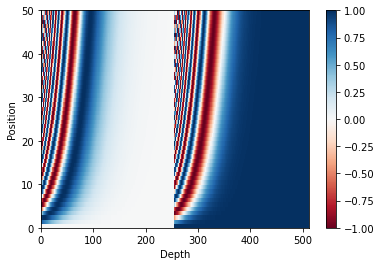

In [18]:
pos_encoding = positional_encoding(50, 512)
print(pos_encoding.shape)

plt.pcolormesh(pos_encoding[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 512))
plt.ylabel('Position')
plt.colorbar()
plt.show() # 在这里左右边分别为原来2i 和 2i+1的特征

In [19]:
def create_padding_mark(seq):
    # 获取为0的padding项
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    
    # 扩充维度以便用于attention矩阵
    return seq[:, np.newaxis, np.newaxis, :] # (batch_size,1,1,seq_len)

# mark 测试
create_padding_mark([[1,2,0,0,3],[3,4,5,0,0]])

<tf.Tensor: shape=(2, 1, 1, 5), dtype=float32, numpy=
array([[[[0., 0., 1., 1., 0.]]],


       [[[0., 0., 0., 1., 1.]]]], dtype=float32)>

In [20]:
def create_look_ahead_mark(size):
    # 1 - 对角线和取下三角的全部对角线（-1->全部）
    # 这样就可以构造出每个时刻未预测token的掩码
    mark = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mark  # (seq_len, seq_len)

In [21]:
temp = create_look_ahead_mark(3)
print(temp)

tf.Tensor(
[[0. 1. 1.]
 [0. 0. 1.]
 [0. 0. 0.]], shape=(3, 3), dtype=float32)


In [22]:
def scaled_dot_product_attention(q, k, v, mask):
    # query key 相乘获取匹配关系
    matmul_qk = tf.matmul(q, k, transpose_b=True)
    
    # 使用dk进行缩放
    dk = tf.cast(tf.shape(k)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)
    
    # 掩码
    if mask is not None:
        scaled_attention_logits += (mask * -1e9)
        
    # 通过softmax获取attention权重
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
    
    # attention 乘上value
    output = tf.matmul(attention_weights, v) # （.., seq_len_v, depth）
    
    return output, attention_weights

In [23]:
def print_out(q, k, v):
    temp_out, temp_att = scaled_dot_product_attention(
    q, k, v, None)
    print('attention weight:')
    print(temp_att)
    print('output:')
    print(temp_out)

In [24]:
# 显示为numpy类型
np.set_printoptions(suppress=True)

temp_k = tf.constant([[10,0,0],
                      [0,10,0],
                      [0,0,10],
                      [0,0,10]], dtype=tf.float32)  # (4, 3)

temp_v = tf.constant([[   1,0],
                      [  10,0],
                      [ 100,5],
                      [1000,6]], dtype=tf.float32)  # (4, 3)
# 关注第2个key, 返回对应的value
temp_q = tf.constant([[0,10,0]], dtype=tf.float32)
print_out(temp_q, temp_k, temp_v)

attention weight:
tf.Tensor([[0. 1. 0. 0.]], shape=(1, 4), dtype=float32)
output:
tf.Tensor([[10.  0.]], shape=(1, 2), dtype=float32)


In [25]:
# 关注重复的key(第3、4个), 返回对应的value（平均）
temp_q = tf.constant([[0,0,10]], dtype=tf.float32)
print_out(temp_q, temp_k, temp_v)

attention weight:
tf.Tensor([[0.  0.  0.5 0.5]], shape=(1, 4), dtype=float32)
output:
tf.Tensor([[550.    5.5]], shape=(1, 2), dtype=float32)


In [26]:
# 关注第1、2个key, 返回对应的value（平均）
temp_q = tf.constant([[10,10,0]], dtype=tf.float32)
print_out(temp_q, temp_k, temp_v)

attention weight:
tf.Tensor([[0.5 0.5 0.  0. ]], shape=(1, 4), dtype=float32)
output:
tf.Tensor([[5.5 0. ]], shape=(1, 2), dtype=float32)


In [27]:
# 依次放入每个query
temp_q = tf.constant([[0, 0, 10], [0, 10, 0], [10, 10, 0]], dtype=tf.float32)  # (3, 3)
print_out(temp_q, temp_k, temp_v)

attention weight:
tf.Tensor(
[[0.  0.  0.5 0.5]
 [0.  1.  0.  0. ]
 [0.5 0.5 0.  0. ]], shape=(3, 4), dtype=float32)
output:
tf.Tensor(
[[550.    5.5]
 [ 10.    0. ]
 [  5.5   0. ]], shape=(3, 2), dtype=float32)


In [28]:
# 构造mutil head attention层
class MutilHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MutilHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model
        
        # d_model 必须可以正确分为各个头
        assert d_model % num_heads == 0
        # 分头后的维度
        self.depth = d_model // num_heads
        
        self.wq = tf.keras.layers.Dense(d_model)
        self.wk = tf.keras.layers.Dense(d_model)
        self.wv = tf.keras.layers.Dense(d_model)
        
        self.dense = tf.keras.layers.Dense(d_model)
        
    def split_heads(self, x, batch_size):
        # 分头, 将头个数的维度 放到 seq_len 前面
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])
    
    def call(self, v, k, q, mask):
        batch_size = tf.shape(q)[0]
        
        # 分头前的前向网络，获取q、k、v语义
        q = self.wq(q)  # (batch_size, seq_len, d_model)
        k = self.wk(k)
        v = self.wv(v)
        
        # 分头
        q = self.split_heads(q, batch_size) # (batch_size, num_heads, seq_len_q, depth)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)
        # scaled_attention.shape == (batch_size, num_heads, seq_len_v, depth)
        # attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
        
        # 通过缩放点积注意力层
        scaled_attention, attention_weights = scaled_dot_product_attention(
        q, k, v, mask)
        # 把多头维度后移
        scaled_attention = tf.transpose(scaled_attention, [0, 2, 1, 3]) # (batch_size, seq_len_v, num_heads, depth)

        # 合并多头
        concat_attention = tf.reshape(scaled_attention, 
                                      (batch_size, -1, self.d_model))
        
        # 全连接重塑
        output = self.dense(concat_attention)
        return output, attention_weights

In [29]:
temp_mha = MutilHeadAttention(d_model=512, num_heads=8)
y = tf.random.uniform((1, 60, 512))
output, att = temp_mha(y, k=y, q=y, mask=None)
print(output.shape, att.shape)

(1, 60, 512) (1, 8, 60, 60)


In [30]:
def point_wise_feed_forward_network(d_model, diff):
    return tf.keras.Sequential([
        tf.keras.layers.Dense(diff, activation='relu'),
        tf.keras.layers.Dense(d_model)
    ])

In [31]:
sample_fnn = point_wise_feed_forward_network(512, 2048)
sample_fnn(tf.random.uniform((64, 50, 512))).shape

TensorShape([64, 50, 512])

In [32]:
class LayerNormalization(tf.keras.layers.Layer):
    def __init__(self, epsilon=1e-6, **kwargs):
        self.eps = epsilon
        super(LayerNormalization, self).__init__(**kwargs)
    def build(self, input_shape):
        self.gamma = self.add_weight(name='gamma', shape=input_shape[-1:],
                                     initializer=tf.ones_initializer(), trainable=True)
        self.beta = self.add_weight(name='beta', shape=input_shape[-1:],
                                    initializer=tf.zeros_initializer(), trainable=True)
        super(LayerNormalization, self).build(input_shape)
    def call(self, x):
        mean = tf.keras.backend.mean(x, axis=-1, keepdims=True)
        std = tf.keras.backend.std(x, axis=-1, keepdims=True)
        return self.gamma * (x - mean) / (std + self.eps) + self.beta
    def compute_output_shape(self, input_shape):
        return input_shape

In [33]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, n_heads, ddf, dropout_rate=0.1):
        super(EncoderLayer, self).__init__()
        
        self.mha = MutilHeadAttention(d_model, n_heads)
        self.ffn = point_wise_feed_forward_network(d_model, ddf)
        
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        
        self.dropout1 = tf.keras.layers.Dropout(dropout_rate)
        self.dropout2 = tf.keras.layers.Dropout(dropout_rate)
        
    def call(self, inputs, training, mask):
        # 多头注意力网络
        att_output, _ = self.mha(inputs, inputs, inputs, mask)
        att_output = self.dropout1(att_output, training=training)
        out1 = self.layernorm1(inputs + att_output)  # (batch_size, input_seq_len, d_model)
        # 前向网络
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, input_seq_len, d_model)
        return out2

In [34]:
sample_encoder_layer = EncoderLayer(512, 8, 2048)
sample_encoder_layer_output = sample_encoder_layer(
tf.random.uniform((64, 43, 512)), False, None)

sample_encoder_layer_output.shape

TensorShape([64, 43, 512])

In [35]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, drop_rate=0.1):
        super(DecoderLayer, self).__init__()
        
        self.mha1 = MutilHeadAttention(d_model, num_heads)
        self.mha2 = MutilHeadAttention(d_model, num_heads)
        
        self.ffn = point_wise_feed_forward_network(d_model, dff)
        
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.layernorm3 = LayerNormalization(epsilon=1e-6)
        
        self.dropout1 = layers.Dropout(drop_rate)
        self.dropout2 = layers.Dropout(drop_rate)
        self.dropout3 = layers.Dropout(drop_rate)
        
    def call(self,inputs, encode_out, training, 
             look_ahead_mask, padding_mask):
        # masked muti-head attention
        att1, att_weight1 = self.mha1(inputs, inputs, inputs,look_ahead_mask)
        att1 = self.dropout1(att1, training=training)
        out1 = self.layernorm1(inputs + att1)
        # muti-head attention
        att2, att_weight2 = self.mha2(encode_out, encode_out, inputs, padding_mask)
        att2 = self.dropout2(att2, training=training)
        out2 = self.layernorm2(out1 + att2)
        
        ffn_out = self.ffn(out2)
        ffn_out = self.dropout3(ffn_out, training=training)
        out3 = self.layernorm3(out2 + ffn_out)
        
        return out3, att_weight1, att_weight2

In [36]:
sample_decoder_layer = DecoderLayer(512, 8, 2048)

sample_decoder_layer_output, _, _ = sample_decoder_layer(
tf.random.uniform((64, 50, 512)), sample_encoder_layer_output,
    False, None, None)
sample_decoder_layer_output.shape

TensorShape([64, 50, 512])

In [37]:
class Encoder(layers.Layer):
    def __init__(self, n_layers, d_model, n_heads, ddf,
                input_vocab_size, max_seq_len, drop_rate=0.1):
        super(Encoder, self).__init__()
        
        self.n_layers = n_layers
        self.d_model = d_model
        
        self.embedding = layers.Embedding(input_vocab_size, d_model)
        self.pos_embedding = positional_encoding(max_seq_len, d_model)
        
        self.encode_layer = [EncoderLayer(d_model, n_heads, ddf, drop_rate)
                            for _ in range(n_layers)]
        
        self.dropout = layers.Dropout(drop_rate)
    def call(self, inputs, training, mark):
        
        seq_len = inputs.shape[1]
        word_emb = self.embedding(inputs)
        word_emb *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        emb = word_emb + self.pos_embedding[:,:seq_len,:]
        x = self.dropout(emb, training=training)
        for i in range(self.n_layers):
            x = self.encode_layer[i](x, training, mark)
        
        return x

In [38]:
sample_encoder = Encoder(2, 512, 8, 1024, 5000, 200)
sample_encoder_output = sample_encoder(tf.random.uniform((64, 120)),
                                      False, None)
sample_encoder_output.shape

TensorShape([64, 120, 512])

In [39]:
# import pdb
# pdb.set_trace()
class Decoder(layers.Layer):
    def __init__(self, n_layers, d_model, n_heads, ddf,
                target_vocab_size, max_seq_len, drop_rate=0.1):
        super(Decoder, self).__init__()
        
        self.d_model = d_model
        self.n_layers = n_layers
        
        self.embedding = layers.Embedding(target_vocab_size, d_model)
        self.pos_embedding = positional_encoding(max_seq_len, d_model)
        
        self.decoder_layers= [DecoderLayer(d_model, n_heads, ddf, drop_rate)
                             for _ in range(n_layers)]
        
        self.dropout = layers.Dropout(drop_rate)
        
    def call(self, inputs, encoder_out,training,
             look_ahead_mark, padding_mark):
    
        seq_len = tf.shape(inputs)[1]
        attention_weights = {}
        h = self.embedding(inputs)
        h *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        h += self.pos_embedding[:,:seq_len,:]
        
        h = self.dropout(h, training=training)
#         print('--------------------\n',h, h.shape)
        # 叠加解码层
        for i in range(self.n_layers):
            h, att_w1, att_w2 = self.decoder_layers[i](h, encoder_out,
                                                   training, look_ahead_mark,
                                                   padding_mark)
            attention_weights['decoder_layer{}_att_w1'.format(i+1)] = att_w1
            attention_weights['decoder_layer{}_att_w2'.format(i+1)] = att_w2
        
        return h, attention_weights

In [40]:
sample_decoder = Decoder(2, 512,8,1024,5000, 200)
sample_decoder_output, attn = sample_decoder(tf.random.uniform((64, 100)),
                                            sample_encoder_output, False,
                                            None, None)
sample_decoder_output.shape, attn['decoder_layer1_att_w1'].shape

(TensorShape([64, 100, 512]), TensorShape([64, 8, 100, 100]))

In [41]:
class Transformer(tf.keras.Model):
    def __init__(self, n_layers, d_model, n_heads, diff,
                input_vocab_size, target_vocab_size,
                max_seq_len, drop_rate=0.1):
        super(Transformer, self).__init__()
        
        self.encoder = Encoder(n_layers, d_model, n_heads,diff,
                              input_vocab_size, max_seq_len, drop_rate)
        
        self.decoder = Decoder(n_layers, d_model, n_heads, diff,
                              target_vocab_size, max_seq_len, drop_rate)
        
        self.final_layer = tf.keras.layers.Dense(target_vocab_size)
    def call(self, inputs, targets, training, encode_padding_mask, 
            look_ahead_mask, decode_padding_mask):
        
        encode_out = self.encoder(inputs, training, encode_padding_mask)
        print(encode_out.shape)
        decode_out, att_weights = self.decoder(targets, encode_out, training, 
                                               look_ahead_mask, decode_padding_mask)
        print(decode_out.shape)
        final_out = self.final_layer(decode_out)
        
        return final_out, att_weights

In [42]:
sample_transformer = Transformer(
n_layers=2, d_model=512, n_heads=8, diff=1024,
input_vocab_size=8500, target_vocab_size=8000, max_seq_len=120
)
temp_input = tf.random.uniform((64, 62))
temp_target = tf.random.uniform((64, 26))
fn_out, _ = sample_transformer(temp_input, temp_target, training=False,
                              encode_padding_mask=None,
                               look_ahead_mask=None,
                               decode_padding_mask=None,
                              )
fn_out.shape

(64, 62, 512)
(64, 26, 512)


TensorShape([64, 26, 8000])

In [43]:
num_layers = 8
d_model = 128
dff = 512
num_heads = 16

input_vocab_size = tokenizer_cn.vocab_size + 2
target_vocab_size = tokenizer_en.vocab_size + 2
max_seq_len = 40
dropout_rate = 0.1

In [44]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
        
        self.d_model = tf.cast(d_model, tf.float32)
        self.warmup_steps = warmup_steps
    
    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)
        
        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [45]:
learing_rate = CustomSchedule(d_model)
optimizer = tf.keras.optimizers.Adam(learing_rate, beta_1=0.9, 
                                    beta_2=0.98, epsilon=1e-9)

Text(0, 0.5, 'learning rate')

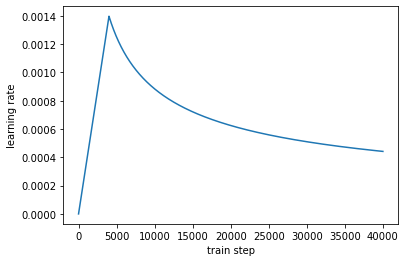

In [46]:
# 测试
temp_learing_rate = CustomSchedule(d_model)
plt.plot(temp_learing_rate(tf.range(40000, dtype=tf.float32)))
plt.xlabel('train step')
plt.ylabel('learning rate')

In [47]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True,
                                                           reduction='none')

def loss_fun(y_ture, y_pred):
    mask = tf.math.logical_not(tf.math.equal(y_ture, 0))  # 为0掩码标1
    loss_ = loss_object(y_ture, y_pred)
    
    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask
    return tf.reduce_mean(loss_)

In [48]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

In [49]:
transformer = Transformer(num_layers, d_model, num_heads, dff,
                          input_vocab_size, target_vocab_size,
                          max_seq_len, dropout_rate)

In [50]:
# 构建掩码
def create_mask(inputs,targets):
    encode_padding_mask = create_padding_mark(inputs)
    # 这个掩码用于掩输入解码层第二层的编码层输出
    decode_padding_mask = create_padding_mark(inputs)
    
    # look_ahead 掩码， 掩掉未预测的词
    look_ahead_mask = create_look_ahead_mark(tf.shape(targets)[1])
    # 解码层第一层得到padding掩码
    decode_targets_padding_mask = create_padding_mark(targets)
    
    # 合并解码层第一层掩码
    combine_mask = tf.maximum(decode_targets_padding_mask, look_ahead_mask)
    
    return encode_padding_mask, combine_mask, decode_padding_mask

In [51]:
checkpoint_path = './checkpoint/train'
ckpt = tf.train.Checkpoint(transformer=transformer,
                          optimizer=optimizer)
# ckpt管理器
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=3)

if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print('last checkpoit restore')

In [52]:
@tf.function
def train_step(inputs, targets):
    tar_inp = targets[:,:-1]
    tar_real = targets[:,1:]
    # 构造掩码
    encode_padding_mask, combined_mask, decode_padding_mask = create_mask(inputs, tar_inp)
    
    
    with tf.GradientTape() as tape:
        predictions, _ = transformer(inputs, tar_inp,
                                    True,
                                    encode_padding_mask,
                                    combined_mask,
                                    decode_padding_mask)
        loss = loss_fun(tar_real, predictions)
    # 求梯度
    gradients = tape.gradient(loss, transformer.trainable_variables)
    # 反向传播
    optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))
    
    # 记录loss和准确率
    train_loss(loss)
    train_accuracy(tar_real, predictions)

In [ ]:
EPOCHS = 10000
for epoch in range(EPOCHS):
    start = time.time()
    
    # 重置记录项
    train_loss.reset_states()
    train_accuracy.reset_states()
    
    # inputs 葡萄牙语， targets英语
    
    for batch, (inputs, targets) in enumerate(zip(cn_batch,en_batch)):
        # 训练
        train_step(inputs, targets)
        
        if batch % 500 == 0:
            print('epoch {}, batch {}, loss:{:.4f}, acc:{:.4f}'.format(
            epoch+1, batch, train_loss.result(), train_accuracy.result()
            ))
            
    if (epoch + 1) % 2 == 0:
        ckpt_save_path = ckpt_manager.save()
        print('epoch {}, save model at {}'.format(
        epoch+1, ckpt_save_path
        ))
    
    
    print('epoch {}, loss:{:.4f}, acc:{:.4f}'.format(
    epoch+1, train_loss.result(), train_accuracy.result()
    ))
    
    print('time in 1 epoch:{} secs\n'.format(time.time()-start))

(64, 40, 128)
(64, 39, 128)
(64, 40, 128)
(64, 39, 128)
epoch 1, batch 0, loss:6.9924, acc:0.0000
epoch 1, batch 500, loss:4.4671, acc:0.1526
epoch 1, batch 1000, loss:3.4572, acc:0.2368
epoch 1, batch 1500, loss:3.0348, acc:0.2795
epoch 1, batch 2000, loss:2.7730, acc:0.3132
epoch 1, batch 2500, loss:2.5906, acc:0.3398
epoch 1, batch 3000, loss:2.4434, acc:0.3638
epoch 1, batch 3500, loss:2.3355, acc:0.3831
(48, 40, 128)
(48, 39, 128)
epoch 1, loss:2.3241, acc:0.3852
time in 1 epoch:382.43542885780334 secs

epoch 2, batch 0, loss:1.5069, acc:0.5220
epoch 2, batch 500, loss:1.5749, acc:0.5149
epoch 2, batch 1000, loss:1.5483, acc:0.5264
epoch 2, batch 1500, loss:1.5232, acc:0.5339
epoch 2, batch 2000, loss:1.5024, acc:0.5400
epoch 2, batch 2500, loss:1.4876, acc:0.5441
epoch 2, batch 3000, loss:1.4692, acc:0.5488
epoch 2, batch 3500, loss:1.4571, acc:0.5523
epoch 2, save model at ./checkpoint/train\ckpt-1
epoch 2, loss:1.4554, acc:0.5528
time in 1 epoch:345.80479669570923 secs

epoch 3

epoch 18, save model at ./checkpoint/train\ckpt-9
epoch 18, loss:1.0774, acc:0.6547
time in 1 epoch:346.8669831752777 secs

epoch 19, batch 0, loss:1.0426, acc:0.6518
epoch 19, batch 500, loss:1.0661, acc:0.6506
epoch 19, batch 1000, loss:1.0659, acc:0.6556
epoch 19, batch 1500, loss:1.0675, acc:0.6561
epoch 19, batch 2000, loss:1.0694, acc:0.6564
epoch 19, batch 2500, loss:1.0728, acc:0.6559
epoch 19, batch 3000, loss:1.0723, acc:0.6560
epoch 19, batch 3500, loss:1.0740, acc:0.6557
epoch 19, loss:1.0739, acc:0.6558
time in 1 epoch:348.04583501815796 secs

epoch 20, batch 0, loss:1.0289, acc:0.6583
epoch 20, batch 500, loss:1.0630, acc:0.6516
epoch 20, batch 1000, loss:1.0627, acc:0.6566
epoch 20, batch 1500, loss:1.0643, acc:0.6571
epoch 20, batch 2000, loss:1.0661, acc:0.6574
epoch 20, batch 2500, loss:1.0694, acc:0.6569
epoch 20, batch 3000, loss:1.0690, acc:0.6570
epoch 20, batch 3500, loss:1.0706, acc:0.6567
epoch 20, save model at ./checkpoint/train\ckpt-10
epoch 20, loss:1.0705,

epoch 36, batch 2500, loss:1.0348, acc:0.6667
epoch 36, batch 3000, loss:1.0347, acc:0.6667
epoch 36, batch 3500, loss:1.0364, acc:0.6664
epoch 36, save model at ./checkpoint/train\ckpt-18
epoch 36, loss:1.0363, acc:0.6665
time in 1 epoch:460.4980204105377 secs

epoch 37, batch 0, loss:0.9858, acc:0.6735
epoch 37, batch 500, loss:1.0267, acc:0.6622
epoch 37, batch 1000, loss:1.0264, acc:0.6671
epoch 37, batch 1500, loss:1.0282, acc:0.6676
epoch 37, batch 2000, loss:1.0301, acc:0.6677
epoch 37, batch 2500, loss:1.0336, acc:0.6672
epoch 37, batch 3000, loss:1.0334, acc:0.6672
epoch 37, batch 3500, loss:1.0350, acc:0.6669
epoch 37, loss:1.0350, acc:0.6669
time in 1 epoch:385.66047072410583 secs

epoch 38, batch 0, loss:0.9792, acc:0.6679
epoch 38, batch 500, loss:1.0249, acc:0.6629
epoch 38, batch 1000, loss:1.0248, acc:0.6673
epoch 38, batch 1500, loss:1.0265, acc:0.6678
epoch 38, batch 2000, loss:1.0286, acc:0.6681
epoch 38, batch 2500, loss:1.0320, acc:0.6675
epoch 38, batch 3000, loss

epoch 54, batch 1000, loss:1.0081, acc:0.6721
epoch 54, batch 1500, loss:1.0099, acc:0.6725
epoch 54, batch 2000, loss:1.0121, acc:0.6727
epoch 54, batch 2500, loss:1.0154, acc:0.6722
epoch 54, batch 3000, loss:1.0154, acc:0.6722
epoch 54, batch 3500, loss:1.0170, acc:0.6719
epoch 54, save model at ./checkpoint/train\ckpt-27
epoch 54, loss:1.0170, acc:0.6720
time in 1 epoch:352.35829162597656 secs

epoch 55, batch 0, loss:0.9660, acc:0.6827
epoch 55, batch 500, loss:1.0082, acc:0.6675
epoch 55, batch 1000, loss:1.0080, acc:0.6721
epoch 55, batch 1500, loss:1.0096, acc:0.6727
epoch 55, batch 2000, loss:1.0116, acc:0.6729
epoch 55, batch 2500, loss:1.0149, acc:0.6723
epoch 55, batch 3000, loss:1.0149, acc:0.6723
epoch 55, batch 3500, loss:1.0165, acc:0.6720
epoch 55, loss:1.0164, acc:0.6721
time in 1 epoch:353.41247177124023 secs

epoch 56, batch 0, loss:0.9674, acc:0.6791
epoch 56, batch 500, loss:1.0072, acc:0.6677
epoch 56, batch 1000, loss:1.0069, acc:0.6726
epoch 56, batch 1500, los

epoch 72, batch 500, loss:0.9968, acc:0.6707
epoch 72, batch 1000, loss:0.9965, acc:0.6754
epoch 72, batch 1500, loss:0.9981, acc:0.6760
epoch 72, batch 2000, loss:1.0003, acc:0.6763
epoch 72, batch 2500, loss:1.0036, acc:0.6756
epoch 72, batch 3000, loss:1.0036, acc:0.6756
epoch 72, batch 3500, loss:1.0053, acc:0.6753
epoch 72, save model at ./checkpoint/train\ckpt-36
epoch 72, loss:1.0053, acc:0.6754
time in 1 epoch:345.6691882610321 secs

epoch 73, batch 0, loss:0.9556, acc:0.6771
epoch 73, batch 500, loss:0.9965, acc:0.6710
epoch 73, batch 1000, loss:0.9962, acc:0.6757
epoch 73, batch 1500, loss:0.9978, acc:0.6763
epoch 73, batch 2000, loss:0.9998, acc:0.6765
epoch 73, batch 2500, loss:1.0030, acc:0.6759
epoch 73, batch 3000, loss:1.0030, acc:0.6759
epoch 73, batch 3500, loss:1.0047, acc:0.6755
epoch 73, loss:1.0047, acc:0.6756
time in 1 epoch:345.81579542160034 secs

epoch 74, batch 0, loss:0.9538, acc:0.6727
epoch 74, batch 500, loss:0.9957, acc:0.6711
epoch 74, batch 1000, loss:

epoch 89, loss:0.9972, acc:0.6777
time in 1 epoch:343.69150376319885 secs

epoch 90, batch 0, loss:0.9552, acc:0.6783
epoch 90, batch 500, loss:0.9889, acc:0.6729
epoch 90, batch 1000, loss:0.9884, acc:0.6776
epoch 90, batch 1500, loss:0.9898, acc:0.6783
epoch 90, batch 2000, loss:0.9917, acc:0.6786
epoch 90, batch 2500, loss:0.9952, acc:0.6780
epoch 90, batch 3000, loss:0.9951, acc:0.6780
epoch 90, batch 3500, loss:0.9967, acc:0.6777
epoch 90, save model at ./checkpoint/train\ckpt-45
epoch 90, loss:0.9967, acc:0.6778
time in 1 epoch:344.70873284339905 secs

epoch 91, batch 0, loss:0.9552, acc:0.6839
epoch 91, batch 500, loss:0.9885, acc:0.6729
epoch 91, batch 1000, loss:0.9878, acc:0.6780
epoch 91, batch 1500, loss:0.9895, acc:0.6786
epoch 91, batch 2000, loss:0.9914, acc:0.6789
epoch 91, batch 2500, loss:0.9948, acc:0.6783
epoch 91, batch 3000, loss:0.9946, acc:0.6782
epoch 91, batch 3500, loss:0.9964, acc:0.6779
epoch 91, loss:0.9963, acc:0.6780
time in 1 epoch:345.81878757476807 se

epoch 107, batch 2000, loss:0.9857, acc:0.6804
epoch 107, batch 2500, loss:0.9890, acc:0.6798
epoch 107, batch 3000, loss:0.9890, acc:0.6798
epoch 107, batch 3500, loss:0.9906, acc:0.6795
epoch 107, loss:0.9906, acc:0.6796
time in 1 epoch:347.2010896205902 secs

epoch 108, batch 0, loss:0.9475, acc:0.6855
epoch 108, batch 500, loss:0.9828, acc:0.6749
epoch 108, batch 1000, loss:0.9823, acc:0.6795
epoch 108, batch 1500, loss:0.9838, acc:0.6800
epoch 108, batch 2000, loss:0.9857, acc:0.6803
epoch 108, batch 2500, loss:0.9889, acc:0.6798
epoch 108, batch 3000, loss:0.9889, acc:0.6798
epoch 108, batch 3500, loss:0.9906, acc:0.6794
epoch 108, save model at ./checkpoint/train\ckpt-54
epoch 108, loss:0.9905, acc:0.6795
time in 1 epoch:346.6625306606293 secs

epoch 109, batch 0, loss:0.9439, acc:0.6875
epoch 109, batch 500, loss:0.9814, acc:0.6752
epoch 109, batch 1000, loss:0.9810, acc:0.6800
epoch 109, batch 1500, loss:0.9829, acc:0.6805
epoch 109, batch 2000, loss:0.9851, acc:0.6806
epoch 1

epoch 124, save model at ./checkpoint/train\ckpt-62
epoch 124, loss:0.9859, acc:0.6810
time in 1 epoch:354.08451795578003 secs

epoch 125, batch 0, loss:0.9468, acc:0.6775
epoch 125, batch 500, loss:0.9772, acc:0.6766
epoch 125, batch 1000, loss:0.9766, acc:0.6814
epoch 125, batch 1500, loss:0.9785, acc:0.6818
epoch 125, batch 2000, loss:0.9805, acc:0.6819
epoch 125, batch 2500, loss:0.9839, acc:0.6813
epoch 125, batch 3000, loss:0.9839, acc:0.6813
epoch 125, batch 3500, loss:0.9854, acc:0.6810
epoch 125, loss:0.9854, acc:0.6811
time in 1 epoch:345.7490017414093 secs

epoch 126, batch 0, loss:0.9453, acc:0.6859
epoch 126, batch 500, loss:0.9773, acc:0.6764
epoch 126, batch 1000, loss:0.9768, acc:0.6812
epoch 126, batch 1500, loss:0.9785, acc:0.6817
epoch 126, batch 2000, loss:0.9805, acc:0.6819
epoch 126, batch 2500, loss:0.9838, acc:0.6813
epoch 126, batch 3000, loss:0.9837, acc:0.6814
epoch 126, batch 3500, loss:0.9854, acc:0.6811
epoch 126, save model at ./checkpoint/train\ckpt-63
e

epoch 142, batch 1000, loss:0.9724, acc:0.6825
epoch 142, batch 1500, loss:0.9742, acc:0.6830
epoch 142, batch 2000, loss:0.9763, acc:0.6832
epoch 142, batch 2500, loss:0.9797, acc:0.6825
epoch 142, batch 3000, loss:0.9797, acc:0.6824
epoch 142, batch 3500, loss:0.9814, acc:0.6821
epoch 142, save model at ./checkpoint/train\ckpt-71
epoch 142, loss:0.9814, acc:0.6821
time in 1 epoch:351.7465012073517 secs

epoch 143, batch 0, loss:0.9242, acc:0.6911
epoch 143, batch 500, loss:0.9731, acc:0.6777
epoch 143, batch 1000, loss:0.9727, acc:0.6825
epoch 143, batch 1500, loss:0.9745, acc:0.6830
epoch 143, batch 2000, loss:0.9765, acc:0.6832
epoch 143, batch 2500, loss:0.9797, acc:0.6826
epoch 143, batch 3000, loss:0.9797, acc:0.6826
epoch 143, batch 3500, loss:0.9812, acc:0.6823
epoch 143, loss:0.9812, acc:0.6824
time in 1 epoch:345.34006810188293 secs

epoch 144, batch 0, loss:0.9270, acc:0.6919
epoch 144, batch 500, loss:0.9728, acc:0.6777
epoch 144, batch 1000, loss:0.9724, acc:0.6825
epoch 

epoch 159, batch 2500, loss:0.9763, acc:0.6834
epoch 159, batch 3000, loss:0.9763, acc:0.6834
epoch 159, batch 3500, loss:0.9779, acc:0.6831
epoch 159, loss:0.9779, acc:0.6832
time in 1 epoch:381.25474858283997 secs

epoch 160, batch 0, loss:0.9292, acc:0.6899
epoch 160, batch 500, loss:0.9697, acc:0.6786
epoch 160, batch 1000, loss:0.9693, acc:0.6833
epoch 160, batch 1500, loss:0.9709, acc:0.6839
epoch 160, batch 2000, loss:0.9730, acc:0.6841
epoch 160, batch 2500, loss:0.9763, acc:0.6835
epoch 160, batch 3000, loss:0.9763, acc:0.6834
epoch 160, batch 3500, loss:0.9779, acc:0.6831
epoch 160, save model at ./checkpoint/train\ckpt-80
epoch 160, loss:0.9779, acc:0.6832
time in 1 epoch:382.90543937683105 secs

epoch 161, batch 0, loss:0.9434, acc:0.6827
epoch 161, batch 500, loss:0.9695, acc:0.6786
epoch 161, batch 1000, loss:0.9692, acc:0.6834
epoch 161, batch 1500, loss:0.9710, acc:0.6838
epoch 161, batch 2000, loss:0.9730, acc:0.6840
epoch 161, batch 2500, loss:0.9761, acc:0.6834
epoch

epoch 177, batch 500, loss:0.9668, acc:0.6796
epoch 177, batch 1000, loss:0.9663, acc:0.6845
epoch 177, batch 1500, loss:0.9679, acc:0.6849
epoch 177, batch 2000, loss:0.9700, acc:0.6852
epoch 177, batch 2500, loss:0.9732, acc:0.6845
epoch 177, batch 3000, loss:0.9732, acc:0.6845
epoch 177, batch 3500, loss:0.9748, acc:0.6841
epoch 177, loss:0.9748, acc:0.6842
time in 1 epoch:345.1526041030884 secs

epoch 178, batch 0, loss:0.9306, acc:0.6919
epoch 178, batch 500, loss:0.9664, acc:0.6797
epoch 178, batch 1000, loss:0.9661, acc:0.6843
epoch 178, batch 1500, loss:0.9678, acc:0.6847
epoch 178, batch 2000, loss:0.9698, acc:0.6849
epoch 178, batch 2500, loss:0.9731, acc:0.6843
epoch 178, batch 3000, loss:0.9731, acc:0.6843
epoch 178, batch 3500, loss:0.9748, acc:0.6839
epoch 178, save model at ./checkpoint/train\ckpt-89
epoch 178, loss:0.9747, acc:0.6840
time in 1 epoch:347.2708685398102 secs

epoch 179, batch 0, loss:0.9274, acc:0.6931
epoch 179, batch 500, loss:0.9658, acc:0.6798
epoch 17